In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [355]:
path_all_Temp = 'C:/Users/Administrator/SHK Auswertung/Stromdichte/'
temp_name = ['Thermo_Electric_305083','Thermo_Electric_307075','Thermo_Electric_605083','Thermo_Electric_607075']
path_list = [path_all_Temp+x+'.nlh' for x in temp_name]
SD_label = ['305083','307075','605083','607075']

all_data = pd.DataFrame()
for col,path in zip(SD_label,path_list):
    if path == path_list[0]:
        df = pd.read_csv(path,header=None,skiprows=7,skipfooter=2,engine='python',sep=' '*5,names=["Time", "Temp_{}".format(col)])
    else:
        df = pd.read_csv(path,header=None,skiprows=7,skipfooter=2,engine='python',sep=' '*5,names=["Time", "Temp_{}".format(col)])["Temp_{}".format(col)]
    all_data = pd.concat([all_data,df],axis=1)

In [358]:
all_data.to_csv('all_temp_data.csv', index=None)

In [360]:
path_puls = 'F:/SHK/Puls/I_NIMAK_0063.csv'
path_temp = 'F:/SHK/Solution/Ring_Buckel_30_5083/Thermo_Electric.nlh'
puls = pd.read_csv(path_puls,header=None,names=["Time", "Puls"])
puls['Time'] = puls.iloc[:,0]+2.0350
puls['Puls'] = puls.iloc[:,1]/1000

puls.head()

,Time,Puls
0,2.0350,0.000
1,2.0351,9.586
2,2.0352,17.640
3,2.0353,25.510
4,2.0354,32.500


In [361]:
temp = pd.read_csv(path_temp,header=None,skiprows=7,skipfooter=2,engine='python',sep=' '*5, names=['Time','Temp'])
# temp['Temp'] = temp.iloc[:,1]+100
temp.head()

,Time,Temp
0,2.0350,298.0023
1,2.0351,298.4503
2,2.0352,299.4114
3,2.0353,300.7414
4,2.0354,302.5584


In [362]:
stromdichte_path_S = ['SD_X_305083_S.txt','SD_X_307075_S.txt','SD_X_605083_S.txt','SD_X_607075_S.txt']
stromdichte_path_T = ['SD_X_305083_T.txt','SD_X_307075_T.txt','SD_X_605083_T.txt','SD_X_607075_T.txt']
stromdichte_label = ['30° 5083','30° 7075','60° 5083','60° 7075']

In [365]:
for path, label in zip(stromdichte_path_S,stromdichte_label):
    stromdichte = pd.read_csv(path,header=None,engine='python',names='x')
    stromdichte['SD'] = None
    for i in range(len(stromdichte)):       
        coordinate = stromdichte['x'][i].split()
        stromdichte['x'][i]=float(coordinate[0])       
        stromdichte['SD'][i]=float(coordinate[1]) 
    stromdichte = stromdichte.loc[stromdichte['SD']!=0,:]
    stromdichte.to_csv(path+'.csv',index= None)

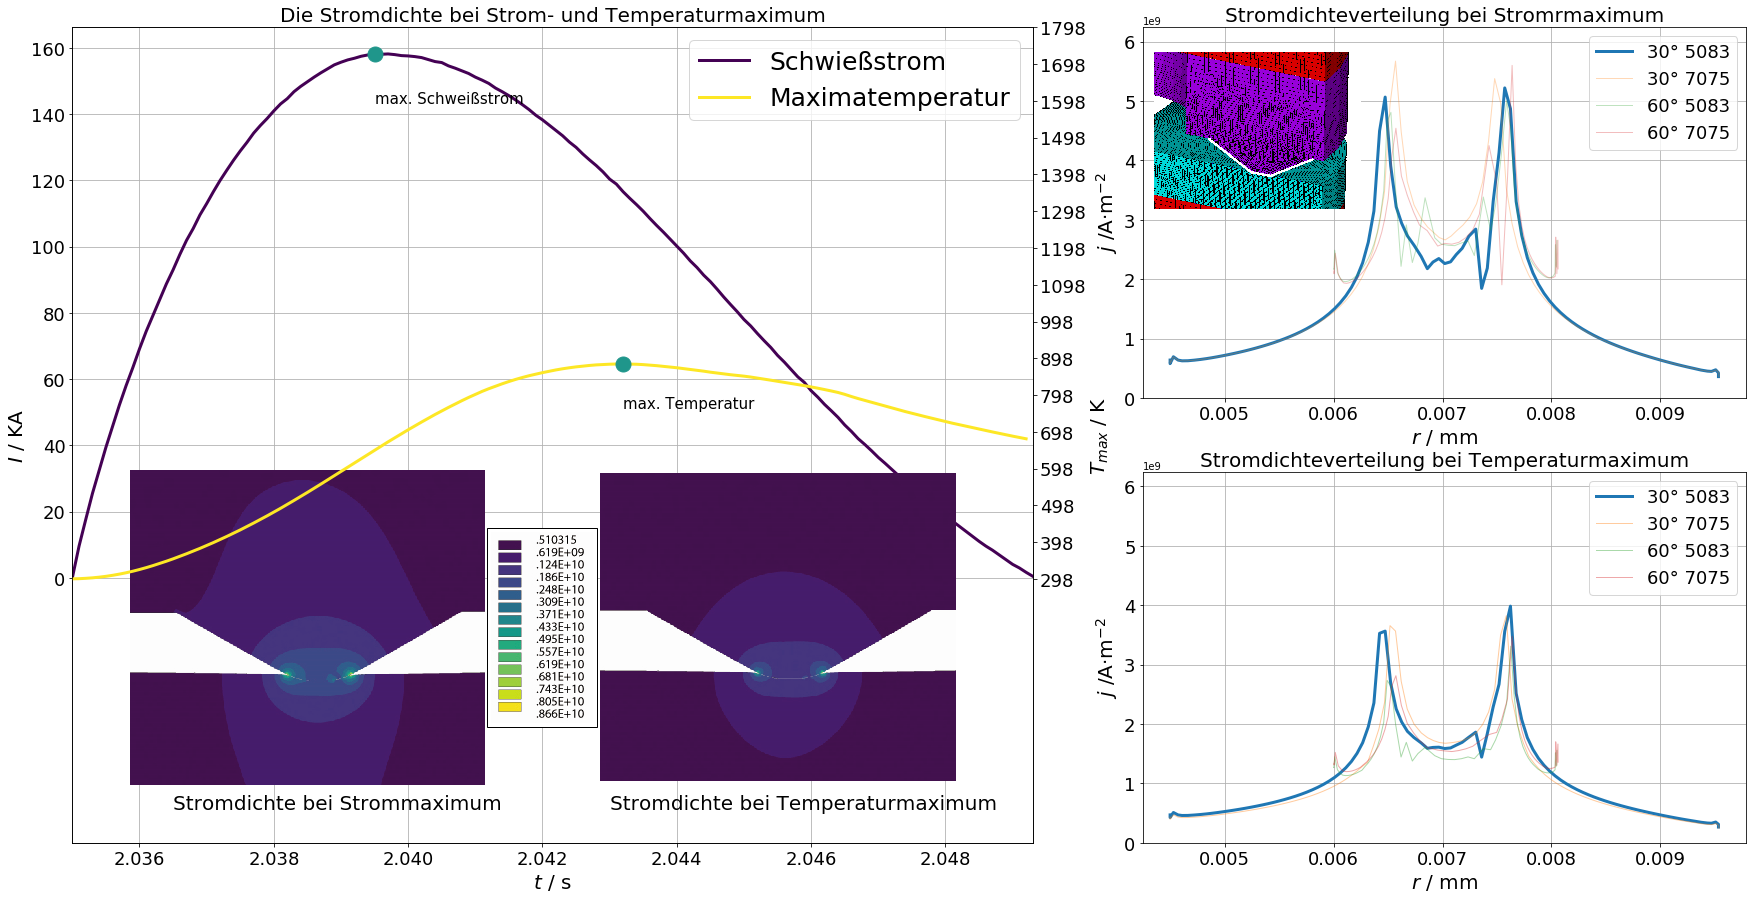

In [363]:
bild = stromdichte_label[0]

fig = plt.figure(constrained_layout=False,figsize=(30,15))
gs = fig.add_gridspec(nrows=2, ncols=15,wspace=12)

f_ax1 = fig.add_subplot(gs[:, :9])
Line_puls,= f_ax1.plot(puls.Time,puls.Puls,'#440154FF',lw = 3,label = 'Schwießstrom')
f_ax1.plot(puls.iloc[puls.Puls.idxmax(),0],max(puls.Puls),color = '#1F968BFF',marker = 'o',markersize= 15)
f_ax1.text(puls.iloc[puls.Puls.idxmax(),0],max(puls.Puls)-15,'max. Schweißstrom',fontsize = 15)
f_ax1.tick_params(axis='both', which='major', labelsize=18)

ax2 = plt.gca().twinx()
Line_temp,=ax2.plot(temp.Time, temp.Temp,"#FDE725FF",lw= 3,label = 'Maximatemperatur')
ax2.plot(temp.iloc[temp.Temp.idxmax(),0],max(temp.Temp),color = '#1F968BFF',marker = 'o',markersize= 15)
ax2.text(temp.iloc[temp.Temp.idxmax(),0],max(temp.Temp)-120,'max. Temperatur',fontsize = 15)
ax2.tick_params(axis='y', which='major', labelsize=18)

f_ax1.set_xlim(min(puls.Time),max(puls.Time))
f_ax1.set_yticks(np.arange(0,170,20))
ax2.set_yticks(np.arange(298,1800,100))
f_ax1.set_ylim(-80)
ax2.set_ylim(-420)

lines = [Line_puls, Line_temp]
f_ax1.legend(lines, [l.get_label() for l in lines], fontsize = 25)

SD_Puls = mpimg.imread('Thermo_Electric045_305083.png')
imagebox = OffsetImage(SD_Puls,zoom= 0.65)
ab = AnnotationBbox(imagebox, (2.0385, -15),frameon=False)
f_ax1.add_artist(ab)

SD_Temp = mpimg.imread('Thermo_Electric082_305083.png')
imagebox2 = OffsetImage(SD_Temp,zoom= 0.65)
ab2 = AnnotationBbox(imagebox2, (2.0455, -15),frameon=False)
f_ax1.add_artist(ab2)

SD_Skala = mpimg.imread('Skala von SD 305083.png')
imagebox3 = OffsetImage(SD_Skala,zoom= 1)
ab3 = AnnotationBbox(imagebox3, ((2.039 +2.045)/2, -15))
f_ax1.add_artist(ab3)

f_ax1.text(2.0365, -70,'Stromdichte bei Strommaximum',fontsize = 20)
f_ax1.text(2.043, -70,'Stromdichte bei Temperaturmaximum',fontsize = 20)

f_ax1.set_xlabel('$t$ / s',fontsize = 20)
f_ax1.set_ylabel('$I$ / KA',fontsize=20)
ax2.set_ylabel('$T$$_{max}$ / K',fontsize=20)

Title = 'Die Stromdichte bei Strom- und Temperaturmaximum'
plt.title(Title,fontsize = 20)
f_ax1.grid()

f_ax2 = fig.add_subplot(gs[0,9: ])
max_ticks = []
for path, label in zip(stromdichte_path_S,stromdichte_label):
    stromdichte = pd.read_csv(path,header=None,engine='python',names='x')
    stromdichte['SD'] = None
    for i in range(len(stromdichte)):       
        coordinate = stromdichte['x'][i].split()
        stromdichte['x'][i]=float(coordinate[0])       
        stromdichte['SD'][i]=float(coordinate[1]) 
    stromdichte = stromdichte.loc[stromdichte['SD']!=0,:]
    if label == bild:
        alpha = 1
        lw = 3
    else:
        alpha = 0.3
        lw = 1   
    f_ax2.plot(stromdichte.x,stromdichte.SD,label = label,alpha=alpha,lw = lw)
    max_ticks.append(max(stromdichte.SD))

f_ax2.set_ylim(0,max(max_ticks)*1.1)
f_ax2.legend(fontsize= 18)


SD_Temp = mpimg.imread('3D.png')
imagebox = OffsetImage(SD_Temp,zoom= 0.3)
ab = AnnotationBbox(imagebox, (0.0053, 4.5e9),frameon=False)
f_ax2.add_artist(ab)

f_ax2.set_xlabel('$r$ / mm',fontsize = 20)
f_ax2.set_ylabel('$j$ /A·m$^{-2}$',fontsize=20)
f_ax2.tick_params(axis='both', which='major', labelsize=18)
f_ax2.grid()

Title = 'Stromdichteverteilung bei Stromrmaximum'
plt.title(Title,fontsize = 20)

f_ax3 = fig.add_subplot(gs[1, 9:])

for path, label in zip(stromdichte_path_T,stromdichte_label):
    stromdichte = pd.read_csv(path,header=None,engine='python',names='x')
    stromdichte['SD'] = None
    for i in range(len(stromdichte)):       
        coordinate = stromdichte['x'][i].split()
        stromdichte['x'][i]=float(coordinate[0])       
        stromdichte['SD'][i]=float(coordinate[1]) 
    stromdichte = stromdichte.loc[stromdichte['SD']!=0,:]
    if label == bild:
        alpha = 1
        lw = 3
    else:
        alpha = 0.4
        lw = 1
    f_ax3.plot(stromdichte.x,stromdichte.SD,label = label,alpha=alpha,lw = lw)
f_ax3.legend(fontsize= 18)

f_ax3.set_ylim(0,max(max_ticks)*1.1)
f_ax3.set_xlabel('$r$ / mm',fontsize = 20)
f_ax3.set_ylabel('$j$ /A·m$^{-2}$',fontsize=20)
f_ax3.tick_params(axis='both', which='major', labelsize=18)
f_ax3.grid()

Title = 'Stromdichteverteilung bei Temperaturmaximum'
plt.title(Title,fontsize = 20)
plt.savefig('Die Stromdichte({}).png'.format(bild),dpi = 300, bbox_inches='tight')
plt.show()

In [299]:
max(max_ticks)

5671293998.8

AttributeError: 'Line2D' object has no property 'figsize'

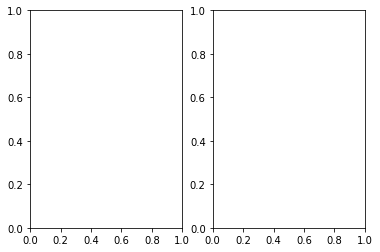

In [259]:
fig, (ax1, ax2) = plt.subplots(1,2)

Line_puls= ax1.plot(puls.Time,puls.Puls,'#440154FF',lw = 3,label = 'Schwießstrom',figsize = (20,15))
ax1.plot(puls.iloc[puls.Puls.idxmax(),0],max(puls.Puls),color = '#1F968BFF',marker = 'o',markersize= 15)
ax.text(puls.iloc[puls.Puls.idxmax(),0],max(puls.Puls)-15,'max. Schweißstrom',fontsize = 15)

ax.text(2.0365, -70,'Stromdichte bei Strommaximum',fontsize = 20)
ax.text(2.043, -70,'Stromdichte bei Temperaturmaximum',fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=15)


ax2 = plt.gca().twinx()
Line_temp,=ax2.plot(temp.Time, temp.Temp,"#FDE725FF",lw= 3,label = 'Maxmatemperatur')
ax2.plot(temp.iloc[temp.Temp.idxmax(),0],max(temp.Temp),color = '#1F968BFF',marker = 'o',markersize= 15)
ax2.text(temp.iloc[temp.Temp.idxmax(),0],max(temp.Temp)-120,'max. Temperatur',fontsize = 15)
ax2.tick_params(axis='y', which='major', labelsize=15)

ax.set_xlim(min(puls.Time),max(puls.Time))
ax.set_yticks(np.arange(0,170,20))
ax2.set_yticks(np.arange(298,1500,100))
ax.set_ylim(-80)
ax2.set_ylim(-310)


lines = [Line_puls, Line_temp]
ax.legend(lines, [l.get_label() for l in lines], fontsize = 15)

SD_Puls = mpimg.imread('Thermo_Electric045_307075.png')
imagebox = OffsetImage(SD_Puls,zoom= 0.7)
ab = AnnotationBbox(imagebox, (2.0385, -10),frameon=False)
ax.add_artist(ab)

SD_Temp = mpimg.imread('Thermo_Electric086_307075.png')
imagebox2 = OffsetImage(SD_Temp,zoom= 0.7)
ab2 = AnnotationBbox(imagebox2, (2.0455, -10),frameon=False)
ax.add_artist(ab2)

SD_Skala = mpimg.imread('Skala von SD 307075.png')
imagebox3 = OffsetImage(SD_Skala,zoom= 1.5)
ab3 = AnnotationBbox(imagebox3, ((2.039 +2.045)/2, -10))
ax.add_artist(ab3)

ax.set_xlabel('$t$ / s',fontsize = 20)
ax.set_ylabel('$I$ / KA',fontsize=20)
ax2.set_ylabel('$T$$_{max}$ / K',fontsize=20)

Title = 'Die Stromdichte bei Strom- und Temperaturmaximum'
plt.title(Title,fontsize = 25)

ax.grid()
plt.savefig('Die Stromdichte bei Strom- und Temperaturmaximum.svg')
plt.show()

In [257]:
puls.Puls.idxmax(), temp.Temp.idxmax()

(45, 91)

In [258]:
temp.iloc[temp.Temp.idxmax(),1]

1762.999

In [284]:
puls.iloc[puls.Puls.idxmax(),0]

2.0395000000000003

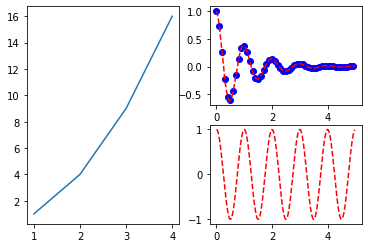

In [11]:
import matplotlib.pyplot as plt
import numpy as np



def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

if __name__ == '__main__' :
    t1 = np.arange(0, 5, 0.1)
    t2 = np.arange(0, 5, 0.02)

    plt.figure(12)
    plt.subplot(222)
    plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r--')

    plt.subplot(224)
    plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')

    plt.subplot(121)
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

    plt.show()